# Welcome to CS4243 Tutorial 2
In this tutorial, we will walk through some examples for edge detection. 

You can opt to use images provided it the zipped folder or use your own image to run demo.

### Part 1
**Edge Extraction**

We know that differentiation can be used to extract edge. However, it is very sensitive to noise. We therefore utilize DoG(Derivative of Gaussian) filter with smoothing.

In [7]:
!pip install scikit-image

In [8]:
# Import the necessary packages that will be used in the following implementation
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage

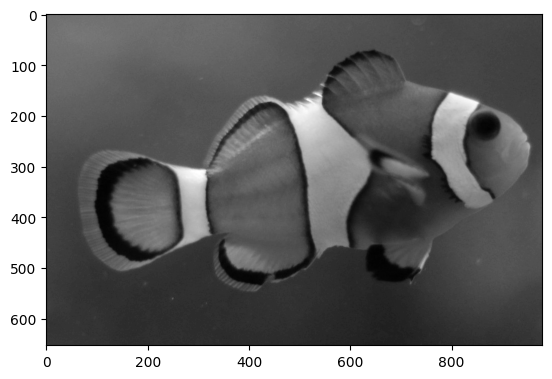

In [9]:
# Reading the image for edge extraction
img = cv2.imread('Input-Files/Nemo.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')
h, w = img.shape


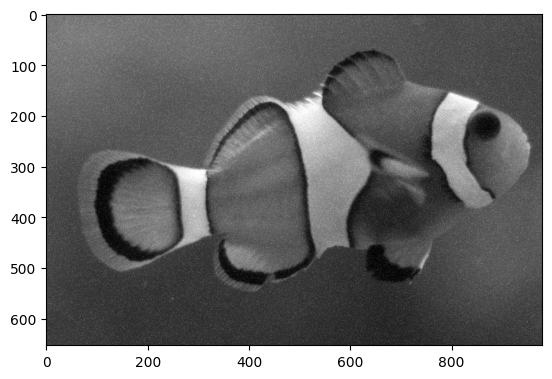

In [10]:
# Add Gaussian noise with μ=0 and σ=20 to the image Nemo.jpeg to produce a noisy image 

##################Your code here#########################
gauss_noise=np.zeros((h,w),dtype=np.uint8)
cv2.randn(gauss_noise,0,20)
gauss_noise=(gauss_noise).astype(np.uint8)
gn_img=cv2.add(img,gauss_noise)
##################Your code here#########################

plt.imshow(gn_img, cmap='gray')

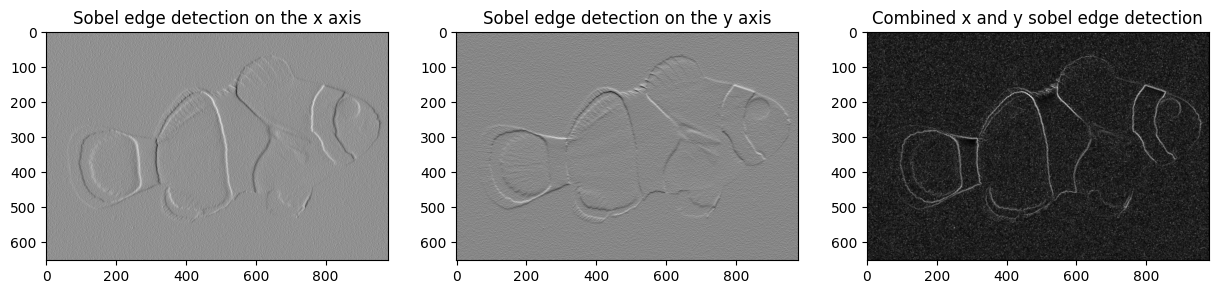

In [24]:
# Sobel Edge Detection with size of 3 on x, y and xy axis, respectively
# https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
##################Your code here#########################
img_sobelx = cv2.Sobel(src=gn_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
img_sobely = cv2.Sobel(src=gn_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
abs_grad_x = cv2.convertScaleAbs(img_sobelx)
abs_grad_y = cv2.convertScaleAbs(img_sobely)
img_sobelxy = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

##################Your code here#########################


plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('Sobel edge detection on the x axis')
plt.imshow(img_sobelx, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('Sobel edge detection on the y axis')
plt.imshow(img_sobely, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('Combined x and y sobel edge detection')
plt.imshow(img_sobelxy, cmap = 'gray')

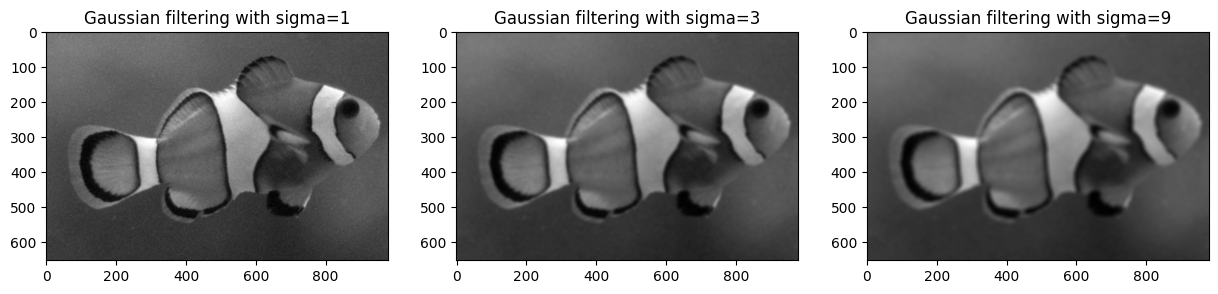

In [12]:
# Smooth the noisy image with a Gaussian filter of size=15 and sigma=1/3/9  

##################Your code here#########################
img_blur1 = cv2.GaussianBlur(gn_img,(15,15),1)
img_blur2 = cv2.GaussianBlur(gn_img,(15,15),3)
img_blur3 = cv2.GaussianBlur(gn_img,(15,15),9)
##################Your code here#########################

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('Gaussian filtering with sigma=1')
plt.imshow(img_blur1, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('Gaussian filtering with sigma=3')
plt.imshow(img_blur2, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('Gaussian filtering with sigma=9')
plt.imshow(img_blur3, cmap = 'gray')

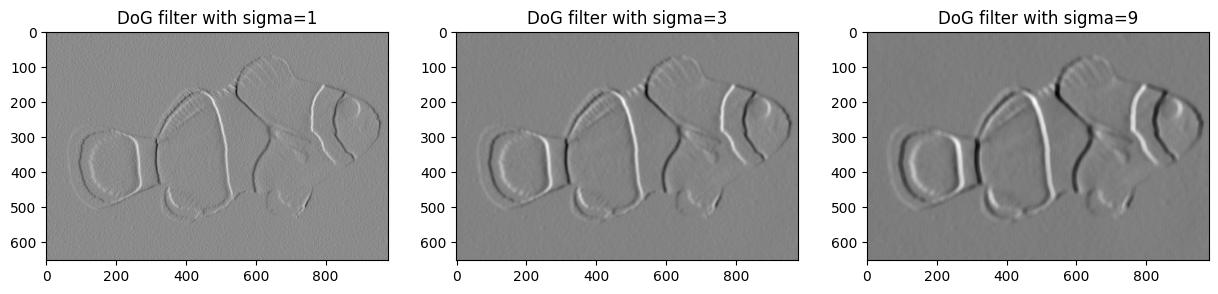

In [13]:
# Apply the built-in cv2.Sobel with size of 3 to the different smoothed images on the x-axis and compare the outputs.  Are there any differences in the extracted edges?

##################Your code here#########################
img_DoG1 = cv2.Sobel(src=img_blur1, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
img_DoG2 = cv2.Sobel(src=img_blur2, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
img_DoG3 = cv2.Sobel(src=img_blur3, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
##################Your code here#########################

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('DoG filter with sigma=1')
plt.imshow(img_DoG1, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('DoG filter with sigma=3')
plt.imshow(img_DoG2, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('DoG filter with sigma=9')
plt.imshow(img_DoG3, cmap = 'gray')

The given image is smoothed using a Gaussian kernel of certain width sigma=1,3,9. We can see wider detected edges as the sigma increases.

### Part 2
**Canny Edge Detection**

We will see some examples about Canny Edge Detector.



(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

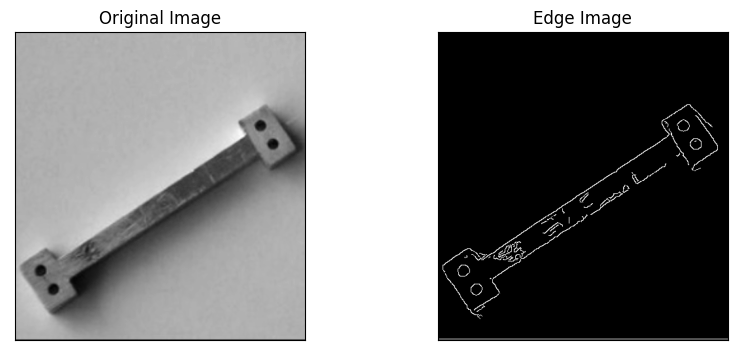

In [14]:
# Read the original image and resize
dummy_image = cv2.imread('Input-Files/Pole.png')
dummy_image = cv2.cvtColor(dummy_image, cv2.COLOR_BGR2GRAY)

# Apply cv2.Canny with using {50, 100} as {threshold1, threshold2}
##################Your code here#########################
img_edges = cv2.Canny(dummy_image, 50, 100)
##################Your code here#########################

fig = plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(dummy_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Threshold=[50,300]'), ([], []), ([], []))

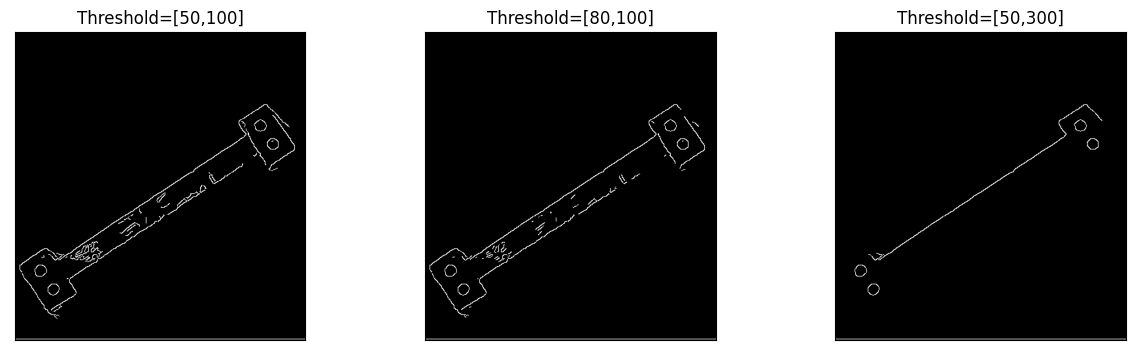

In [15]:
# Compare edge outputs when thresholds = {50, 100}, {80, 100} and {50, 300} 
##################Your code here#########################
edge1 = cv2.Canny(dummy_image, 50, 100)
edge2 = cv2.Canny(dummy_image, 80, 100)
edge3 = cv2.Canny(dummy_image, 50, 300)
##################Your code here#########################

fig = plt.figure(figsize=(15,4))
plt.subplot(131),plt.imshow(edge1,cmap = 'gray')
plt.title('Threshold=[50,100]'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edge2,cmap = 'gray')
plt.title('Threshold=[80,100]'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edge3,cmap = 'gray')
plt.title('Threshold=[50,300]'), plt.xticks([]), plt.yticks([])